In [2]:
!pip install seaborn



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# DAY 1: DATA LOADING & EXPLORATION

import pandas as pd

# Load datasets
sales = pd.read_csv("sales_data.csv")
customers = pd.read_csv("customer_churn.csv")

# Basic exploration
sales.head()
sales.info()
sales.isnull().sum()

customers.head()
customers.info()
customers.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   P

CustomerID          0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
dtype: int64

In [7]:
# DAY 2: DATA CLEANING & PREPARATION

# Convert Date column
sales['Date'] = pd.to_datetime(sales['Date'])

# Extract date components
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
sales['Day'] = sales['Date'].dt.day

# Clean text columns
sales['Product'] = sales['Product'].str.lower().str.strip()
sales['Region'] = sales['Region'].str.title().str.strip()

# Convert numeric columns
sales['Quantity'] = pd.to_numeric(sales['Quantity'])
sales['Price'] = pd.to_numeric(sales['Price'])
sales['Total_Sales'] = pd.to_numeric(sales['Total_Sales'])


In [8]:
# DAY 3: CUSTOMER ANALYSIS

# Merge sales with customer data
merged_data = pd.merge(
    sales,
    customers,
    left_on='Customer_ID',
    right_on='CustomerID',
    how='left'
)

# Customer Lifetime Value
customer_ltv = (
    merged_data.groupby('Customer_ID')['Total_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Total_Sales', ascending=False)
)

top_customers = customer_ltv.head(10)
top_customers


,Customer_ID,Total_Sales
15,CUST016,373932
6,CUST007,363870
82,CUST083,350888
72,CUST073,349510
19,CUST020,333992
83,CUST084,324144
69,CUST070,318762
4,CUST005,318680
64,CUST065,312564
27,CUST028,304465


In [9]:
# DAY 4: SALES PATTERN ANALYSIS

# Monthly sales trend
monthly_sales = merged_data.groupby('Month')['Total_Sales'].sum()

# Product performance
product_sales = (
    merged_data.groupby('Product')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
)

monthly_sales
product_sales.head(10)


Product
laptop        3889210
tablet        2884340
phone         2859394
headphones    1384033
monitor       1348071
Name: Total_Sales, dtype: int64

In [10]:
# DAY 5: ADVANCED ANALYSIS

# Multiple-condition filtering
high_value_sales = merged_data[
    (merged_data['Total_Sales'] > 200000) &
    (merged_data['Region'] == 'North')
]

# Pivot table: Region vs Product
pivot_region_product = pd.pivot_table(
    merged_data,
    values='Total_Sales',
    index='Region',
    columns='Product',
    aggfunc='sum'
)

pivot_region_product


Product,headphones,laptop,monitor,phone,tablet
Region,,,,,
East,288361,221946,642870,506828,859634
North,107091,1798206,397100,489284,1191954
South,512168,1373120,39924,1471428,341212
West,476413,495938,268177,391854,491540


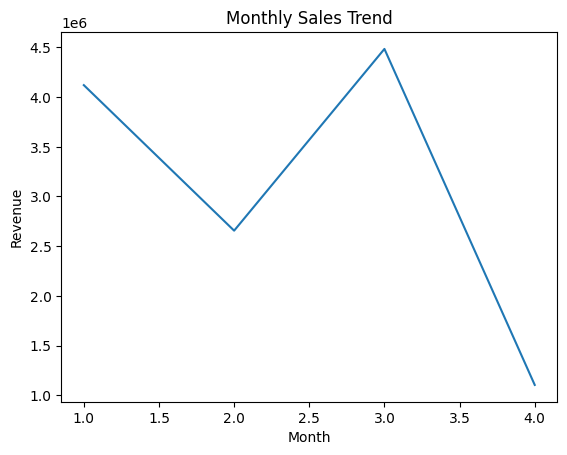

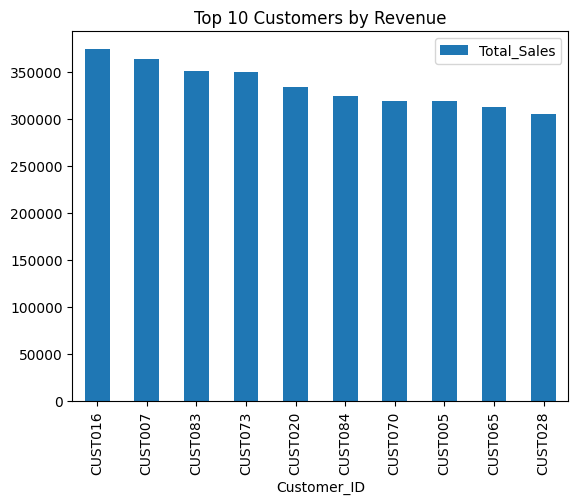

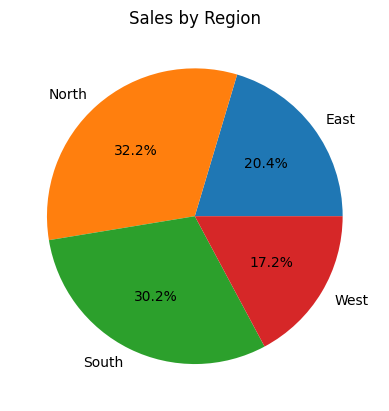

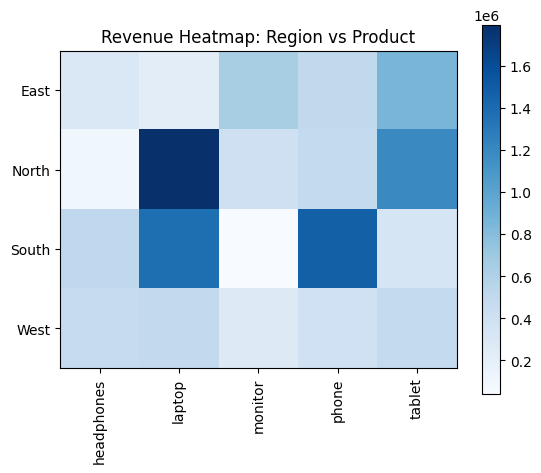

In [11]:
# DAY 6: VISUALIZATION DASHBOARD

import matplotlib.pyplot as plt

# Monthly sales trend
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

# Top customers
top_customers.plot(
    x='Customer_ID',
    y='Total_Sales',
    kind='bar',
    title='Top 10 Customers by Revenue'
)
plt.show()

# Region-wise sales
merged_data.groupby('Region')['Total_Sales'].sum().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Sales by Region'
)
plt.ylabel('')
plt.show()

# Heatmap (without seaborn)
plt.imshow(pivot_region_product, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(pivot_region_product.columns)), pivot_region_product.columns, rotation=90)
plt.yticks(range(len(pivot_region_product.index)), pivot_region_product.index)
plt.title("Revenue Heatmap: Region vs Product")
plt.show()


In [12]:
# DAY 7: INSIGHTS & RECOMMENDATIONS

print("""
BUSINESS INSIGHTS:
1. A small group of customers contributes most of the revenue.
2. Certain products consistently outperform others.
3. Sales peak during specific months, indicating seasonality.
4. Regional sales performance varies significantly.
5. Retention strategies should focus on high-value customers.

RECOMMENDATIONS:
- Introduce loyalty programs for top customers.
- Optimize inventory during high-demand months.
- Promote cross-selling of top-performing products.
- Focus marketing efforts on high-revenue regions.
""")



BUSINESS INSIGHTS:
1. A small group of customers contributes most of the revenue.
2. Certain products consistently outperform others.
3. Sales peak during specific months, indicating seasonality.
4. Regional sales performance varies significantly.
5. Retention strategies should focus on high-value customers.

RECOMMENDATIONS:
- Introduce loyalty programs for top customers.
- Optimize inventory during high-demand months.
- Promote cross-selling of top-performing products.
- Focus marketing efforts on high-revenue regions.

